**Table of contents**<a id='toc0_'></a>    
- [Import dataset](#toc1_)    
- [EDA](#toc2_)    
  - [Train Data](#toc2_1_)    
    - [Extract date and month from data](#toc2_1_1_)    
    - [Extract hour and minutes from data](#toc2_1_2_)    
    - [Extract hour and minute from arrival_time](#toc2_1_3_)    
    - [Extract hour and minute from duration](#toc2_1_4_)    
    - [Handling Categorical Data](#toc2_1_5_)    
    - [Process the `airline` column](#toc2_1_6_)    
    - [Process the `source` column](#toc2_1_7_)    
    - [Process the `destination` column](#toc2_1_8_)    
    - [Process the `route` and `additional_info` column](#toc2_1_9_)    
    - [Process the `total_stops` column](#toc2_1_10_)    
    - [Combine the all the data](#toc2_1_11_)    
    - [Drop unessary columns](#toc2_1_12_)    
  - [Test Data](#toc2_2_)    
    - [Save EDA Data](#toc2_2_1_)    
- [Feature Selection](#toc3_)    
    - [Correlation Heatmap](#toc3_1_1_)    
    - [Important feature using ExtraTreesRegressor](#toc3_1_2_)    
- [Fitting model using Random Forest](#toc4_)    
    - [Split dataset into train and test set](#toc4_1_1_)    
      - [Save Final data](#toc4_1_1_1_)    
    - [Import model and fit the data](#toc4_1_2_)    
    - [Evaluate](#toc4_1_3_)    
- [Hyperparameter Tuning](#toc5_)    
- [Save the model](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_column', None)

# <a id='toc1_'></a>[Import dataset](#toc0_)

In [60]:
train_data = pd.read_excel('../data/raw/Data_Train.xlsx')

# <a id='toc2_'></a>[EDA](#toc0_)

## <a id='toc2_1_'></a>[Train Data](#toc0_)

In [61]:
train_data.dropna(inplace=True)

### <a id='toc2_1_1_'></a>[Extract date and month from data](#toc0_)

In [62]:
# Make all column name become a snake case
train_data.columns = train_data.columns.str.lower()

In [63]:
train_data['journey_day'] = pd.to_datetime(train_data['date_of_journey'], format='%d/%m/%Y').dt.day
train_data['journey_month'] = pd.to_datetime(train_data['date_of_journey'], format='%d/%m/%Y').dt.month
train_data.drop('date_of_journey', axis=1, inplace=True)

### <a id='toc2_1_2_'></a>[Extract hour and minutes from data](#toc0_)

In [64]:
train_data['dep_hour'] = pd.to_datetime(train_data['dep_time']).dt.hour
train_data['dep_minutes'] = pd.to_datetime(train_data['dep_time']).dt.minute
train_data.drop('dep_time', axis=1, inplace=True)

### <a id='toc2_1_3_'></a>[Extract hour and minute from arrival_time](#toc0_)

In [65]:
train_data['arrival_hour'] = pd.to_datetime(train_data['arrival_time']).dt.hour
train_data['arrival_minutes'] = pd.to_datetime(train_data['arrival_time']).dt.minute
train_data.drop('arrival_time', axis=1, inplace=True)

### <a id='toc2_1_4_'></a>[Extract hour and minute from duration](#toc0_)

In [66]:
train_data[['duration_hours', 'duration_minutes']] = train_data['duration'].str.extract(r'(\d+h)?\s?(\d+m|\d+)?', expand=True)
train_data['duration_hours'] = train_data['duration_hours'].str.strip('h').astype(float).fillna(0).astype(int)
train_data['duration_minutes'] = train_data['duration_minutes'].str.strip('m').astype(float).fillna(0).astype(int)

train_data.drop(["duration"], axis = 1, inplace = True)

### <a id='toc2_1_5_'></a>[Handling Categorical Data](#toc0_)
1. `Nominal Data` --> data is not in order --> `One Hot Encoding`
2. `Ordinal Data` --> data is in order --> `Label Encoding`

### <a id='toc2_1_6_'></a>[Process the `airline` column](#toc0_)

In [67]:
train_data['airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: airline, dtype: int64

<Figure size 1000x500 with 0 Axes>

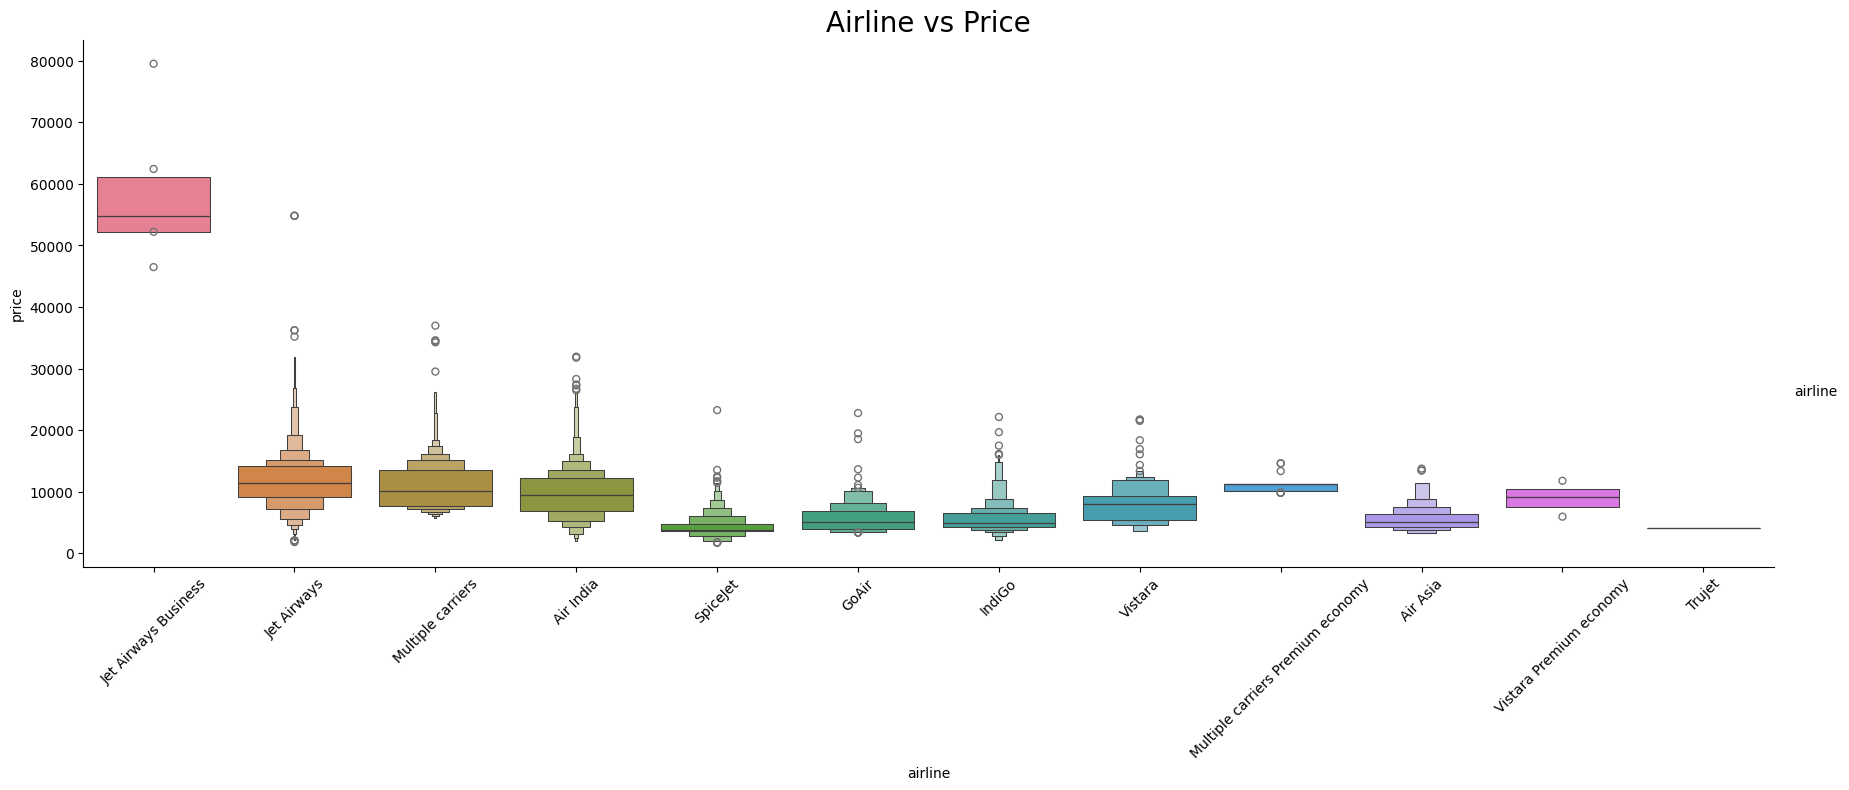

In [68]:
# We can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

plt.figure(figsize=(10,5))
sns.catplot(y = "price", x = "airline", data = train_data.sort_values("price", ascending = False), hue='airline', kind="boxen", height = 6, aspect = 3)
plt.title('Airline vs Price', fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [69]:
# Just because `airline` is a nominal data we can apply One Hot Encoding
airline = train_data[['airline']]
airline = pd.get_dummies(airline, drop_first=True) ; airline.head()

,airline_Air India,airline_GoAir,airline_IndiGo,airline_Jet Airways,airline_Jet Airways Business,airline_Multiple carriers,airline_Multiple carriers Premium economy,airline_SpiceJet,airline_Trujet,airline_Vistara,airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### <a id='toc2_1_7_'></a>[Process the `source` column](#toc0_)

In [70]:
train_data['source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: source, dtype: int64

<Figure size 1000x500 with 0 Axes>

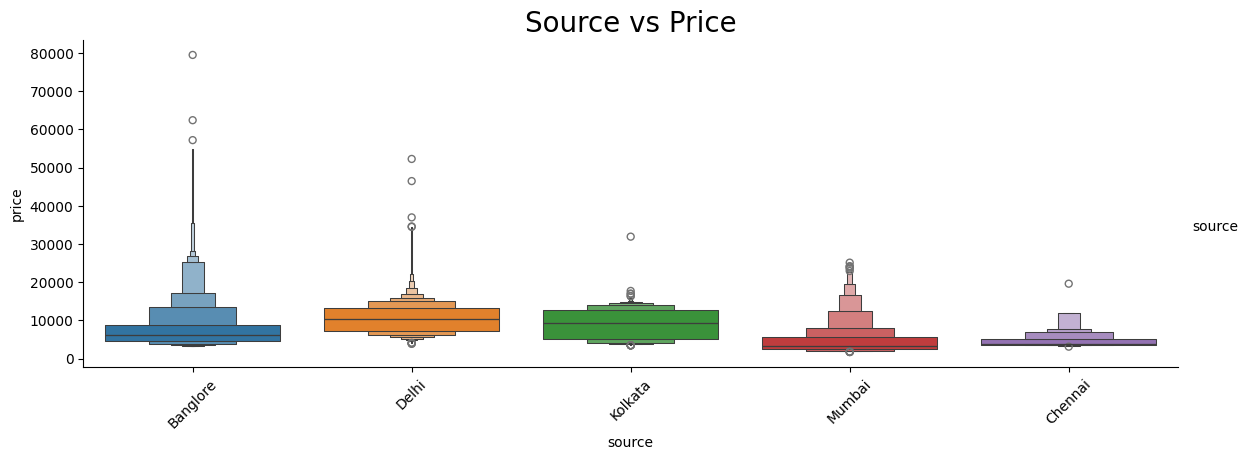

In [71]:
plt.figure(figsize=(10,5))
sns.catplot(y = "price", x = "source", data = train_data.sort_values("price", ascending = False), hue='source', kind="boxen", height = 4, aspect = 3)
plt.title('Source vs Price', fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [72]:
# Just because `airline` is a nominal data we can apply One Hot Encoding
source = train_data[['source']]
source = pd.get_dummies(source, drop_first=True)
source.head()

,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### <a id='toc2_1_8_'></a>[Process the `destination` column](#toc0_)

In [73]:
train_data['destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: destination, dtype: int64

<Figure size 1000x500 with 0 Axes>

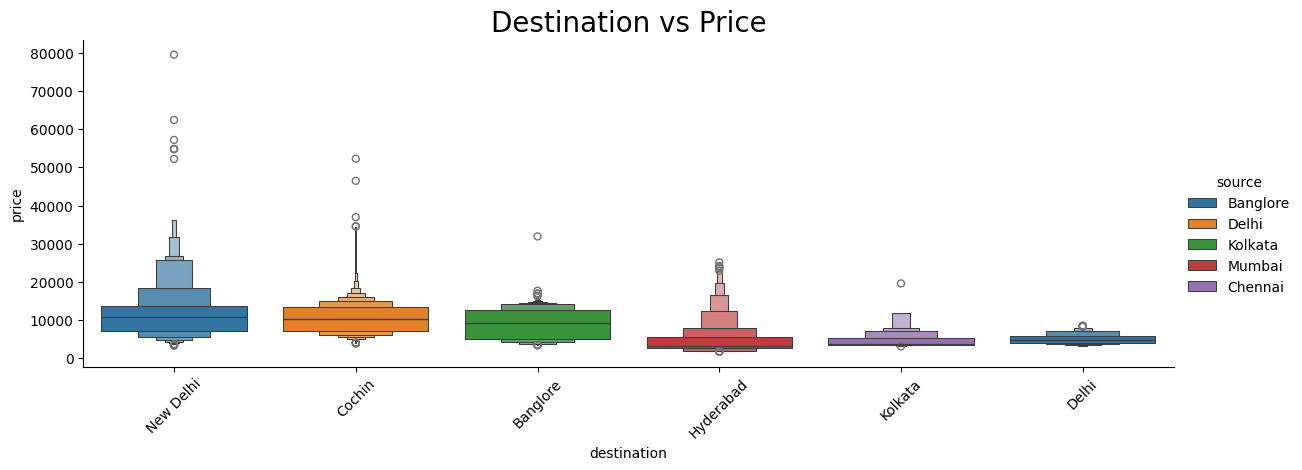

In [74]:
plt.figure(figsize=(10,5))
sns.catplot(y = "price", x = "destination", data = train_data.sort_values("price", ascending = False), hue='source', kind="boxen", height = 4, aspect = 3)
plt.title('Destination vs Price', fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [75]:
# Just because `airline` is a nominal data we can apply One Hot Encoding
destination = train_data[['destination']]
destination = pd.get_dummies(destination, drop_first=True)
destination.head()

,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


### <a id='toc2_1_9_'></a>[Process the `route` and `additional_info` column](#toc0_)
- Most of `additional_info` just no_info, so we can ignore it
- And for the `route` this can be represent by `total_stops` columns

In [76]:
train_data['route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: route, Length: 10682, dtype: object

In [77]:
train_data.additional_info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: additional_info, dtype: int64

In [78]:
train_data.drop(['route','additional_info'], axis=1, inplace=True)

### <a id='toc2_1_10_'></a>[Process the `total_stops` column](#toc0_)

In [79]:
train_data.head()

,airline,source,destination,total_stops,price,journey_day,journey_month,dep_hour,dep_minutes,arrival_hour,arrival_minutes,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [80]:
train_data['total_stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: total_stops, dtype: int64

<Figure size 1000x500 with 0 Axes>

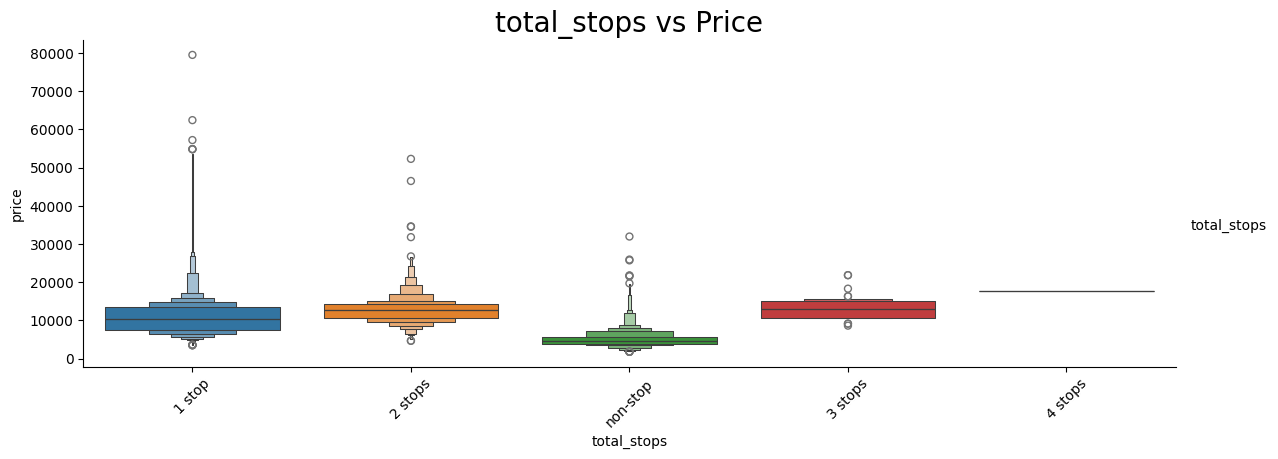

In [81]:
plt.figure(figsize=(10,5))
sns.catplot(y = "price", x = "total_stops", data = train_data.sort_values("price", ascending = False), hue='total_stops', kind="boxen", height = 4, aspect = 3)
plt.title('total_stops vs Price', fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [82]:
# Just because if more total_stop usually have more trips, 
# or maybe can be less cheaper because short trip, 
# but the total stop have meaning in order, so we need to make it into Ordinal Data

total_stops = {
    'non-stop': 0,
    '1 stop' : 1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4
}

In [83]:
train_data.loc[train_data['total_stops'].isna()]

,airline,source,destination,total_stops,price,journey_day,journey_month,dep_hour,dep_minutes,arrival_hour,arrival_minutes,duration_hours,duration_minutes


In [84]:
train_data['total_stops'] = train_data['total_stops'].map(total_stops).astype('int')

In [85]:
train_data.head()

,airline,source,destination,total_stops,price,journey_day,journey_month,dep_hour,dep_minutes,arrival_hour,arrival_minutes,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


### <a id='toc2_1_11_'></a>[Combine the all the data](#toc0_)

In [86]:
train_data = pd.concat([train_data, airline, source, destination], axis=1)

### <a id='toc2_1_12_'></a>[Drop unessary columns](#toc0_)

In [87]:
train_data.drop(['airline','source','destination'], axis=1, inplace=True)

In [88]:
train_data.head()

,total_stops,price,journey_day,journey_month,dep_hour,dep_minutes,arrival_hour,arrival_minutes,duration_hours,duration_minutes,airline_Air India,airline_GoAir,airline_IndiGo,airline_Jet Airways,airline_Jet Airways Business,airline_Multiple carriers,airline_Multiple carriers Premium economy,airline_SpiceJet,airline_Trujet,airline_Vistara,airline_Vistara Premium economy,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [89]:
train_data.shape

(10682, 30)

## <a id='toc2_2_'></a>[Test Data](#toc0_)

In [90]:
test_data = pd.read_excel('../data/raw/Test_set.xlsx')

In [92]:
# Dropping null values
test_data.dropna(inplace = True)
# Make all column name become a snake case
test_data.columns = test_data.columns.str.lower()

test_data['journey_day'] = pd.to_datetime(test_data['date_of_journey'], format='%d/%m/%Y').dt.day
test_data['journey_month'] = pd.to_datetime(test_data['date_of_journey'], format='%d/%m/%Y').dt.month
test_data.drop('date_of_journey', axis=1, inplace=True)

test_data['dep_hour'] = pd.to_datetime(test_data['dep_time']).dt.hour
test_data['dep_minutes'] = pd.to_datetime(test_data['dep_time']).dt.minute
test_data.drop('dep_time', axis=1, inplace=True)

test_data['arrival_hour'] = pd.to_datetime(test_data['arrival_time']).dt.hour
test_data['arrival_minutes'] = pd.to_datetime(test_data['arrival_time']).dt.minute
test_data.drop('arrival_time', axis=1, inplace=True)

test_data[['duration_hours', 'duration_minutes']] = test_data['duration'].str.extract(r'(\d+h)?\s?(\d+m|\d+)?', expand=True)
test_data['duration_hours'] = test_data['duration_hours'].str.strip('h').astype(float).fillna(0).astype(int)
test_data['duration_minutes'] = test_data['duration_minutes'].str.strip('m').astype(float).fillna(0).astype(int)

test_data.drop(["duration"], axis = 1, inplace = True)

airline = test_data[['airline']]
airline = pd.get_dummies(airline, drop_first=True)

source = test_data[['source']]
source = pd.get_dummies(source, drop_first=True)

destination = test_data[['destination']]
destination = pd.get_dummies(destination, drop_first=True)

test_data.drop(['route','additional_info'], axis=1, inplace=True)

total_stops = {
    'non-stop': 0,
    '1 stop' : 1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4
}

test_data['total_stops'] = test_data['total_stops'].map(total_stops).astype('int')

test_data = pd.concat([test_data, airline, source, destination], axis=1)

test_data.drop(['airline','source','destination'], axis=1, inplace=True)

In [93]:
test_data.head()

,total_stops,journey_day,journey_month,dep_hour,dep_minutes,arrival_hour,arrival_minutes,duration_hours,duration_minutes,airline_Air India,airline_GoAir,airline_IndiGo,airline_Jet Airways,airline_Jet Airways Business,airline_Multiple carriers,airline_Multiple carriers Premium economy,airline_SpiceJet,airline_Vistara,airline_Vistara Premium economy,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### <a id='toc2_2_1_'></a>[Save EDA Data](#toc0_)

In [94]:
train_data.to_csv('../data/interim/train_data.csv', index=False)
test_data.to_csv('../data/interim/test_data.csv', index=False)

# <a id='toc3_'></a>[Feature Selection](#toc0_)
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

- heatmap
- feature_importance_
- SelectKBest

In [98]:
# Read the data
train_data = pd.read_csv('../data/interim/train_data.csv')
test_data = pd.read_csv('../data/interim/test_data.csv')

In [99]:
train_data.shape

(10682, 30)

In [100]:
train_data.columns

Index(['total_stops', 'price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_minutes', 'arrival_hour', 'arrival_minutes', 'duration_hours',
       'duration_minutes', 'airline_Air India', 'airline_GoAir',
       'airline_IndiGo', 'airline_Jet Airways', 'airline_Jet Airways Business',
       'airline_Multiple carriers',
       'airline_Multiple carriers Premium economy', 'airline_SpiceJet',
       'airline_Trujet', 'airline_Vistara', 'airline_Vistara Premium economy',
       'source_Chennai', 'source_Delhi', 'source_Kolkata', 'source_Mumbai',
       'destination_Cochin', 'destination_Delhi', 'destination_Hyderabad',
       'destination_Kolkata', 'destination_New Delhi'],
      dtype='object')

In [101]:
X = train_data[['total_stops', 'journey_day', 'journey_month',
       'dep_hour', 'dep_minutes', 'arrival_hour', 'arrival_minutes',
       'duration_hours', 'duration_minutes', 'airline_Air India',
       'airline_GoAir', 'airline_IndiGo', 'airline_Jet Airways',
       'airline_Jet Airways Business', 'airline_Multiple carriers',
       'airline_Multiple carriers Premium economy', 'airline_SpiceJet',
       'airline_Trujet', 'airline_Vistara', 'airline_Vistara Premium economy',
       'source_Chennai', 'source_Delhi', 'source_Kolkata', 'source_Mumbai',
       'destination_Cochin', 'destination_Delhi', 'destination_Hyderabad',
       'destination_Kolkata', 'destination_New Delhi']]
X.head()

,total_stops,journey_day,journey_month,dep_hour,dep_minutes,arrival_hour,arrival_minutes,duration_hours,duration_minutes,airline_Air India,airline_GoAir,airline_IndiGo,airline_Jet Airways,airline_Jet Airways Business,airline_Multiple carriers,airline_Multiple carriers Premium economy,airline_SpiceJet,airline_Trujet,airline_Vistara,airline_Vistara Premium economy,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [102]:
y = train_data['price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: price, dtype: int64

### <a id='toc3_1_1_'></a>[Correlation Heatmap](#toc0_)

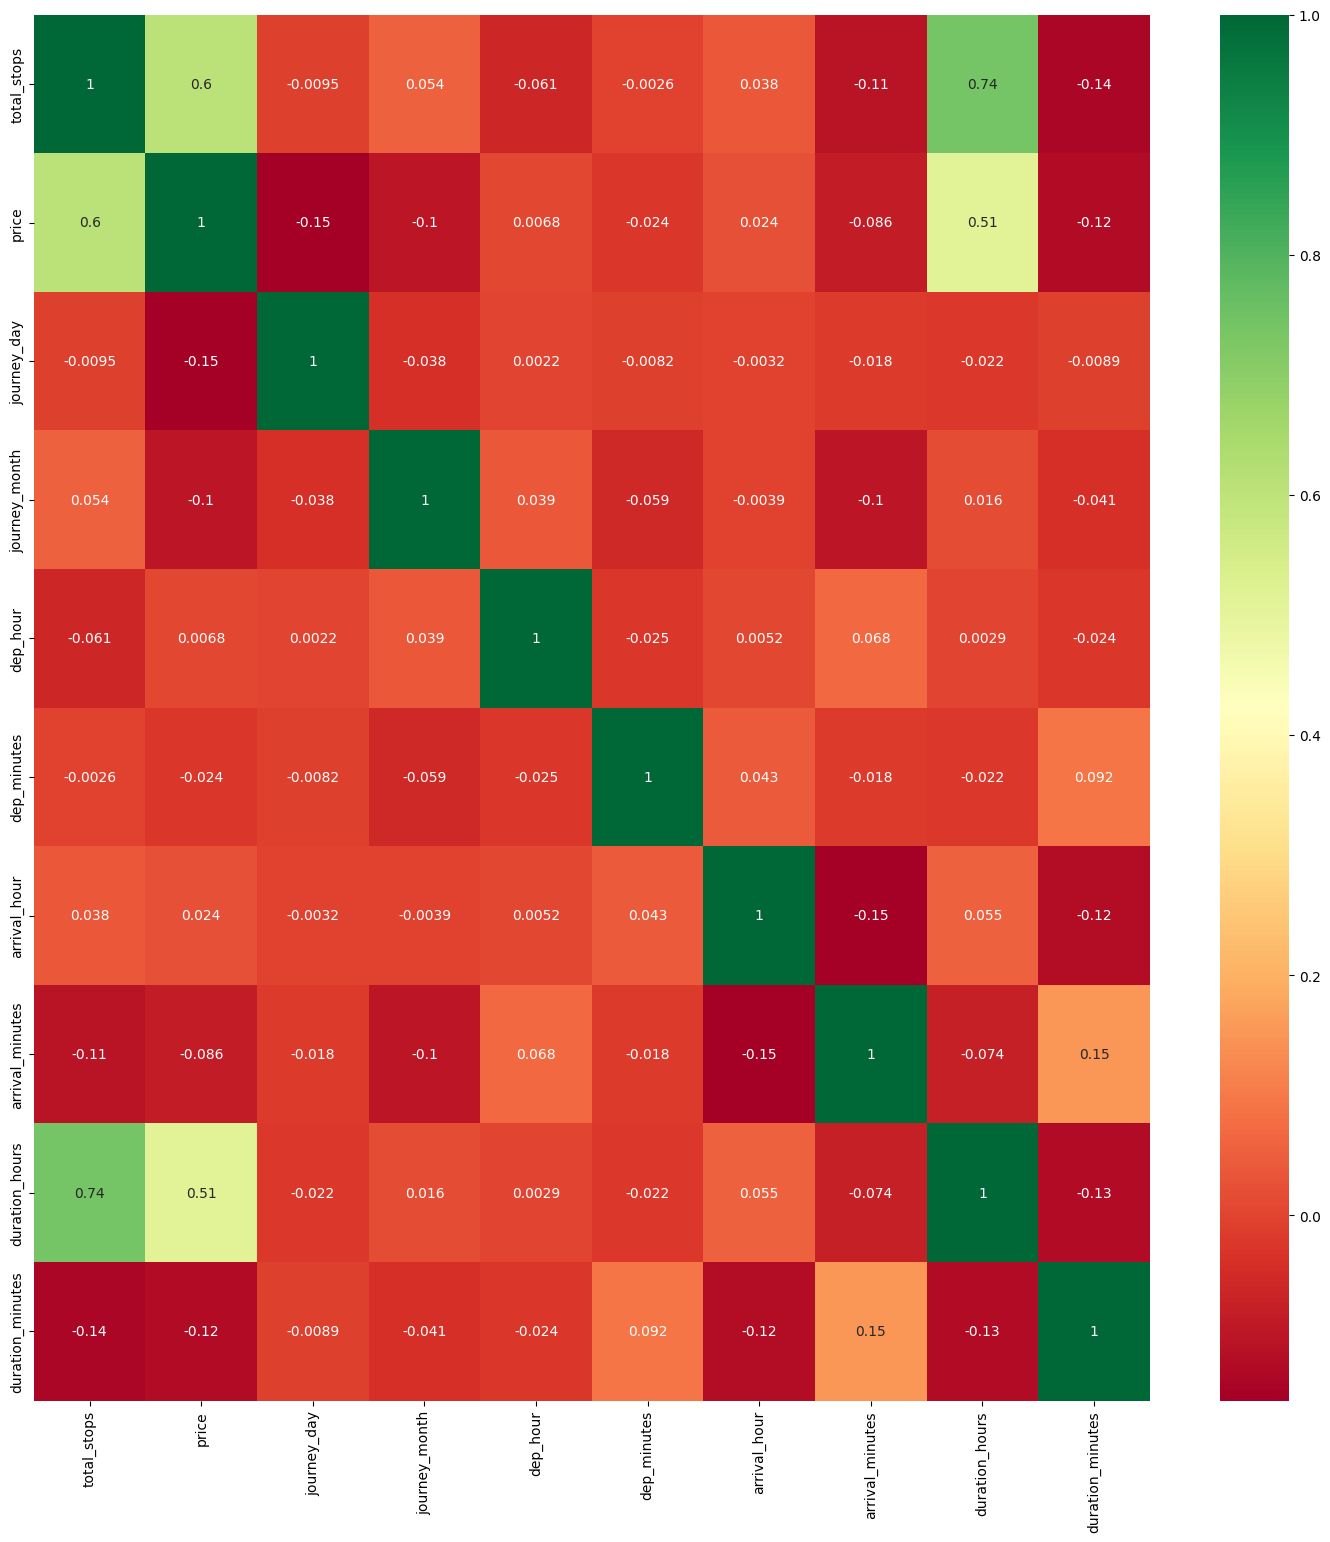

In [103]:
plt.figure(figsize=(18, 18))
sns.heatmap(train_data[['total_stops', 'price', 'journey_day', 'journey_month',
       'dep_hour', 'dep_minutes', 'arrival_hour', 'arrival_minutes',
       'duration_hours', 'duration_minutes']].corr(), annot = True, cmap='RdYlGn')
plt.show()

### <a id='toc3_1_2_'></a>[Important feature using ExtraTreesRegressor](#toc0_)

In [104]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [105]:
print(selection.feature_importances_)

[2.29572740e-01 1.42972082e-01 5.37766612e-02 2.46498723e-02
 2.11753041e-02 2.71215355e-02 1.94895223e-02 1.11987764e-01
 1.80944816e-02 9.77668356e-03 1.77550222e-03 1.73129972e-02
 1.44142433e-01 6.75008629e-02 1.92305190e-02 8.23186779e-04
 2.81603169e-03 1.07014742e-04 5.11622818e-03 9.30920516e-05
 3.80879778e-04 1.63054507e-02 3.27163999e-03 7.38575404e-03
 8.31068575e-03 1.45829416e-02 6.81704816e-03 4.73108264e-04
 2.49379781e-02]


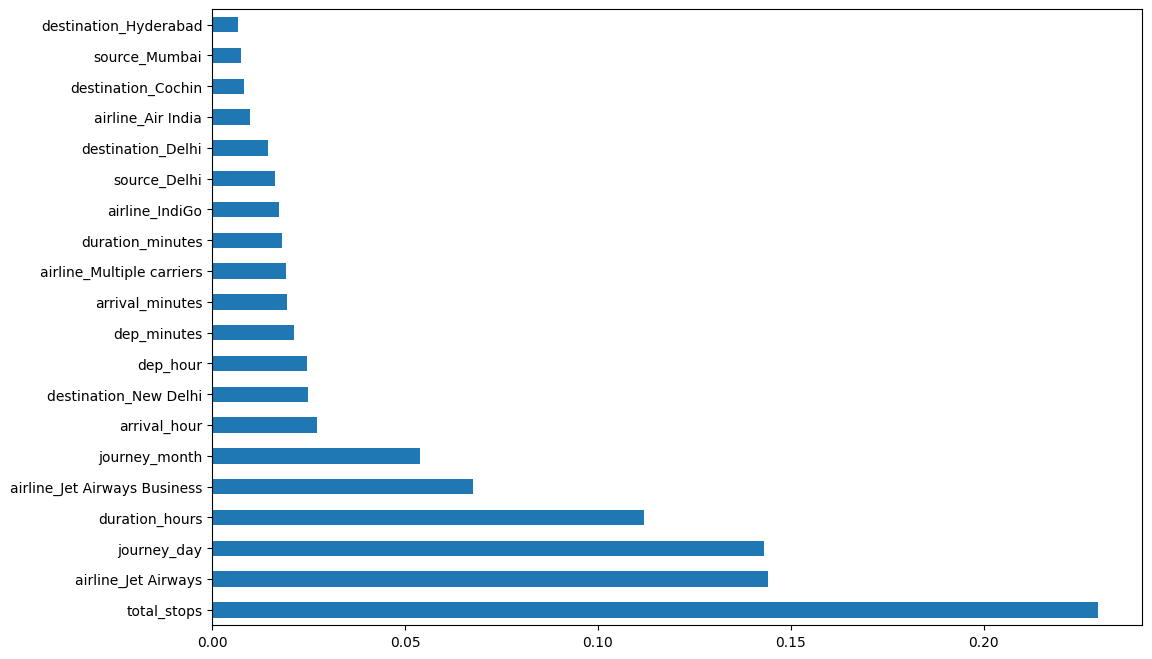

In [106]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# <a id='toc4_'></a>[Fitting model using Random Forest](#toc0_)
- Split dataset into train and test set in order to prediction w.r.t X_test
- If needed do scaling of data
- Import model
- Fit the data
- Predict w.r.t X_test
- In regression check RSME Score
- Plot graph

### <a id='toc4_1_1_'></a>[Split dataset into train and test set](#toc0_)

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### <a id='toc4_1_1_1_'></a>[Save Final data](#toc0_)

In [109]:
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

### <a id='toc4_1_2_'></a>[Import model and fit the data](#toc0_)

In [112]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [114]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [115]:
model.fit(X_train, y_train)

/tmp/ipykernel_341255/180087699.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor()

### <a id='toc4_1_3_'></a>[Evaluate](#toc0_)

In [116]:
y_pred = model.predict(X_test)

In [117]:
print('Train Data Score: ',model.score(X_train, y_train))
print('Test Data Score: ', model.score(X_test, y_test))

Train Data Score:  0.9554276454844016
Test Data Score:  0.7640136211666831


In [121]:
y_test

,price
0,13727
1,15318
2,13377
3,13044
4,5458
...,...
2132,3597
2133,5162
2134,10262
2135,4174


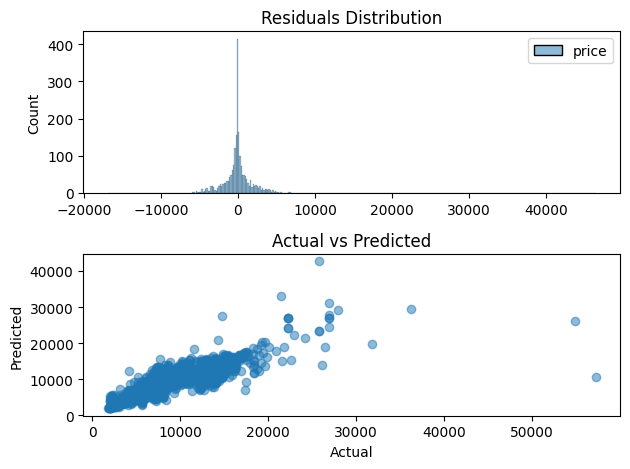

In [123]:
fig, axs = plt.subplots(2, 1)

sns.histplot(y_test - y_pred.reshape(-1,1), ax=axs[0])
axs[0].set_title('Residuals Distribution')

axs[1].scatter(y_test, y_pred, alpha=0.5)
axs[1].set_title('Actual vs Predicted')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

In [124]:
from sklearn import metrics
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('R^2 Score: ', metrics.r2_score(y_test, y_pred))

MAE :  1196.0906794629225
MSE :  4951270.715114064
RMSE :  34.584543938917605
R^2 Score:  0.7640136211666831


# <a id='toc5_'></a>[Hyperparameter Tuning](#toc0_)
- Choose following method for hyperparameter tuning
    - RandomizedSearchCV --> Fast
    - GridSearchCV
- Assign hyperparameters in form of dictionery
- Fit the model
- Check best paramters and best score

In [125]:
from sklearn.model_selection import RandomizedSearchCV

In [126]:
# Randomized Search CV
# Number of tree
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# Number of feature at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [127]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [128]:
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations
model_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=random_grid,
    scoring="neg_mean_squared_error",
    n_iter=10,
    cv=5,
    verbose=2,
    n_jobs=1
)

In [129]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time= 1.4min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time= 1.3min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time= 1.3min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time= 1.3min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time= 1.3min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time= 3.2min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time= 3.2min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time= 3.2min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time= 3.2min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time= 3.3min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=  32.4s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=  32.6s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=  33.1s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=  32.5s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=  31.9s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=  46.2s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=  47.4s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=  46.3s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=  47.0s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=  46.6s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700; total time= 3.2min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700; total time= 3.2min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700; total time= 3.2min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700; total time= 3.2min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700; total time= 3.3min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=400; total time= 1.8min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=400; total time= 1.8min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=400; total time= 1.8min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=400; total time= 1.8min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=400; total time= 1.9min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   7.6s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   6.9s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   7.3s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   7.4s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   6.9s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=  54.9s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=  54.9s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=  54.5s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=  55.1s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=  55.1s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time= 2.1min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time= 2.1min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time= 2.1min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time= 2.2min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time= 2.2min


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=  20.4s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=  20.4s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=  21.2s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=  20.5s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=  20.0s


/home/tinapyp/Dependencies/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [130]:
model_cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [131]:
prediction = model_cv.predict(X_test)

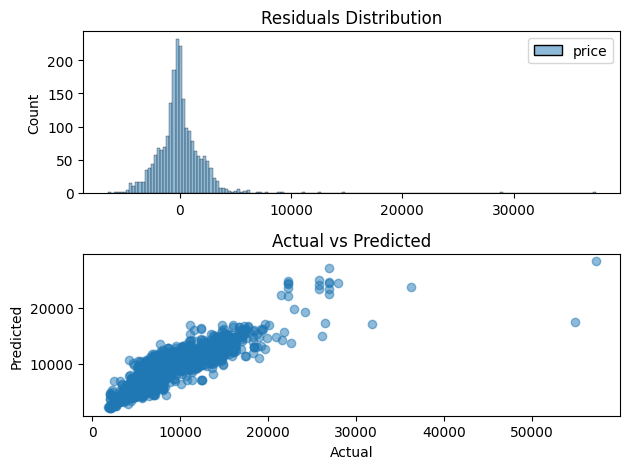

In [133]:
fig, axs = plt.subplots(2, 1)

sns.histplot(y_test - prediction.reshape(-1,1), ax=axs[0])
axs[0].set_title('Residuals Distribution')

axs[1].scatter(y_test, prediction, alpha=0.5)
axs[1].set_title('Actual vs Predicted')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

In [134]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1332.4884092641735
MSE: 4367831.920630727
RMSE: 2089.935865195563


# <a id='toc6_'></a>[Save the model](#toc0_)

In [135]:
import pickle

with open('../models/model.pkl', 'wb') as f:
    pickle.dump(model_cv, f)

In [136]:
model = open('../models/model.pkl', 'rb')
model = pickle.load(model)

In [137]:
y_prediction = model.predict(X_test)

In [138]:
metrics.r2_score(y_test, y_prediction)

0.791821353020389